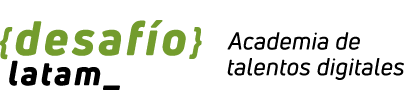

#<center><strong><font color="green">Ley de los Grandes Números</font></strong></center>

##<strong><font color="green">Ley débil</font></strong>
Verificaremos la ley de los grandes números en su versión débil, para lo que simularemos un conjunto de datos.

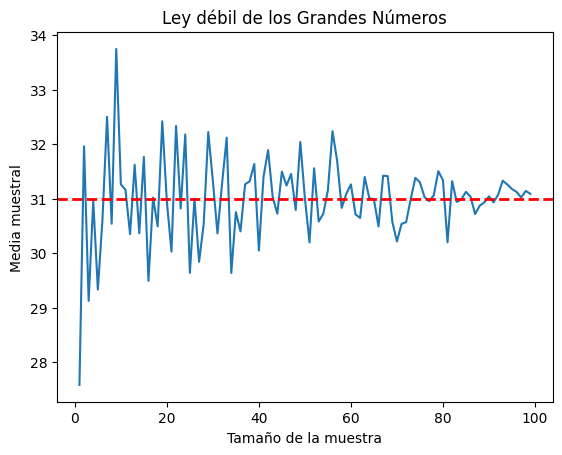

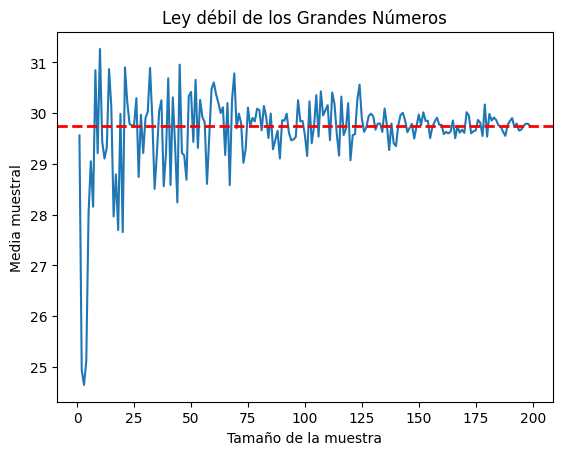

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
# Generar un conjunto de n números aleatorios, entre a y b
#Crearemos una función que genera n números en
def generar_numeros(n,a,b):
    numeros = [random.uniform(a,b) for _ in range(n)]
    return numeros

#definimos ahora una lista de medias muestrales de un conjunto de n elementos, considerando muestras que van desde tamaño 1 hasta n-1
def medias_muestrales(lista):
  medias=[]
  for i in range(1,len(lista)):
    medias.append(np.mean(random.sample(lista,i)))
  return(medias)

#definimos una funcion para comparar gráficamente, considerando diferentes valores:

def comparaMedias(n,a,b):
  valores=generar_numeros(n,a,b)#generamos el conjunto de valores
  media=np.mean(valores) # calculamos su media
  plt.plot(range(1, len(valores)), medias_muestrales(valores))
  plt.axhline(y=media, color='red', linestyle='dashed', linewidth=2, label='Media')
  plt.xlabel('Tamaño de la muestra')
  plt.ylabel('Media muestral')
  plt.title('Ley débil de los Grandes Números')
  plt.show()

comparaMedias(100,20,40)
comparaMedias(200,20,40)

*   Cambia los valores de **n**, **a** y **b** en el bloque anterior, y observa el comportamiento de la curva.

##<strong><font color="green">Ley fuerte</font></strong>
Consideremos el lanzamiento de una moneda. Cuando decimos que "a la larga" la mitad de los lanzamientos serán cara, de algún modo estamos asumiendo una cantidad infinita de lanzamientos. Los resultados de lanzar una moneda pueden considerarse una población, que en este caso sería infinita... y si lo repetimos una cierta cantidad de veces, lo que estamos haciendo es escoger una muestra de esta población.

Ahora bien: si consideramos el experimento **lanzar 6 veces una moneda**, es claro que no siempre obtendremos tres caras y tres sellos... podremos obtener valores diferentes (entre 0 y 6). **También podemos repetir este experimento tantas veces como queramos**. Y cada repetición de este experimento puede ser agregado como un valor a nuestra muestra... es decir, el tamaño de nuestra muestra puede **tender a infinito**.

El lanzamiento de una moneda una cierta cantidad de veces, y el conteo de la cantidad de éxitos (caras) puede modelarse como una distribución binomial, donde la probabilidad de éxito es 0,5. Pero podríamos asumir que, quizás, la moneda puede estar trucada y la probabilidad de obtener cara sea diferente. Así, supongamos que en nuestra moneda la probabilidad de obtener cara es 0,6. Consideramos el experimento de lanzarla 6 veces y contar el número de caras.

La función **np.random.binomial(6,0.6,40)** nos permite crear una lista de 40 repeticiones de esta observación.

In [3]:
valores=np.array(np.random.binomial(6,0.6,40))

print(valores)

[4 3 4 1 2 2 2 4 2 2 4 0 4 3 3 3 5 5 3 3 5 3 3 2 5 3 5 3 3 4 3 4 3 2 5 4 3
 2 5 5]




*   Si la moneda fuera "honesta" (es decir, con probabilidad de cara igual a 0,5), ¿cuál debería ser el valor más típico que salga, al lanzarla 6 veces?
*   Y en este caso, con la probabilidad cambiada, ¿cuál debería ser ese valor más típico? ¿Cómo puedes determinarlo?

Vamos a analizar qué ocurre con el promedio de estos valores



In [4]:
print(valores.mean())

3.275




*   ¿Coincide con lo que esperabas?
*   ¿Qué podríamos hacer para verificarlo mejor?

Probemos considerando entonces el siguiente experimento:

*   Tenemos una moneda cuya probabilidad de obtener cara es **p**
*   Se lanza la moneda **k** veces, y se cuenta el número de caras
*   El experimento anterior se repite **n** veces, y se calcula la media de caras obtenidas. Veremos qué ocurre cuando **n** aumenta cada vez más

In [5]:
p= 0.6
k= 8

#observemos el uso de la función random.binomial
for i in range(10):
  print(np.random.binomial(k,p,size=i+1))

[6]
[5 5]
[2 4 8]
[4 7 3 6]
[6 5 7 5 4]
[5 3 5 4 7 6]
[3 2 5 6 6 5 6]
[3 3 5 6 3 3 6 4]
[3 5 5 6 7 4 6 5 3]
[5 5 5 4 6 4 3 6 5 4]


Como vemos, **np.random.binomial(k,p,size=i)** genera una lista de **i** repeticiones del experimento, siendo **k** el número de lanzamientos y **p** la probabilidad de éxito, considerando una distribución binomial.

Vamos ahora a almacenar las medias muestrales, aumentando la cantidad de repeticiones.

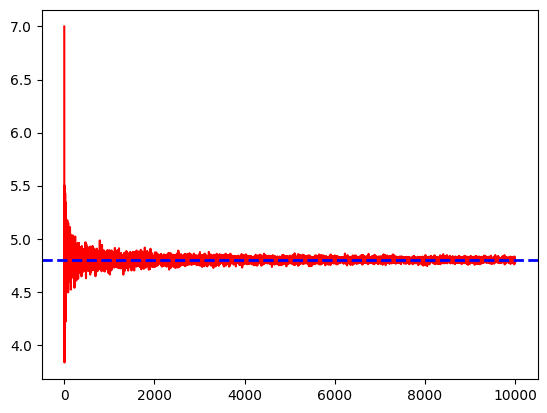

In [6]:
n = 10000

medias_binom=[]
for j in range(n):
  medias_binom.append(np.mean(np.random.binomial(k,p,size=j+1)))

plt.plot(range(1,n+1),medias_binom, color='red',)
plt.axhline(y=k*p, color='blue', linestyle='dashed', linewidth=2, label='k*p')

plt.show()


Modifica el valor de **n**, aumentándolo más y más. ¿A qué valor se aproxima?



#<center><strong><font color="green">Teorema central del límite</font></strong></center>

Consideremos el mismo caso anterior, y generemos una lista de muchas observaciones, calculando en cada caso la media de éxitos.

In [7]:
n = 10000

medias_binom=[]
for j in range(n):
  medias_binom.append(np.mean(np.random.binomial(k,p,size=n)))

print(medias_binom)

[4.7781, 4.8012, 4.8203, 4.8205, 4.8078, 4.8222, 4.7633, 4.803, 4.8147, 4.7965, 4.7867, 4.8161, 4.7904, 4.7708, 4.8123, 4.8161, 4.7803, 4.7954, 4.7915, 4.7945, 4.7743, 4.7974, 4.8034, 4.8059, 4.8211, 4.7929, 4.8094, 4.7992, 4.804, 4.8114, 4.7999, 4.7942, 4.807, 4.8004, 4.8021, 4.781, 4.7922, 4.7888, 4.8034, 4.7981, 4.8002, 4.8055, 4.8032, 4.8211, 4.8274, 4.8061, 4.8158, 4.8123, 4.8191, 4.7936, 4.8022, 4.8198, 4.7998, 4.799, 4.8199, 4.8141, 4.8177, 4.7907, 4.7956, 4.8301, 4.809, 4.7896, 4.7842, 4.8021, 4.7947, 4.8034, 4.8135, 4.8223, 4.7781, 4.8064, 4.7897, 4.8302, 4.8125, 4.8175, 4.8134, 4.8089, 4.8145, 4.8, 4.8101, 4.7948, 4.7903, 4.8017, 4.8076, 4.8003, 4.7822, 4.7776, 4.7889, 4.7973, 4.797, 4.8143, 4.8015, 4.7843, 4.7599, 4.7957, 4.7918, 4.817, 4.8094, 4.795, 4.807, 4.8055, 4.7991, 4.7786, 4.8106, 4.8173, 4.8127, 4.7618, 4.792, 4.801, 4.7925, 4.8043, 4.8113, 4.8006, 4.7929, 4.8088, 4.8243, 4.7866, 4.8184, 4.789, 4.7884, 4.7988, 4.7846, 4.8231, 4.7901, 4.7912, 4.8007, 4.8188, 4.7837,

Observaremos qué sucede si graficamos

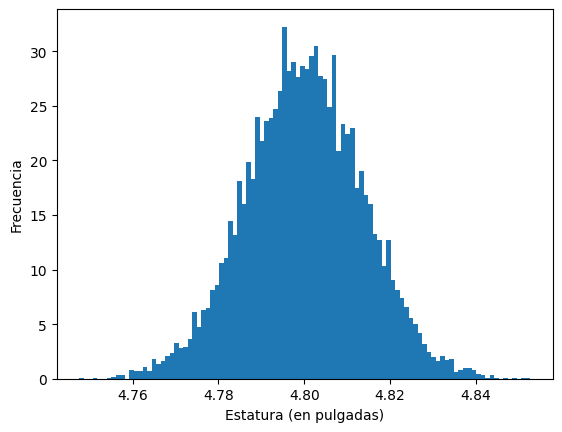

In [8]:
plt.hist(medias_binom, bins=100,density=True)
#plt.axvline(x=media, color='red', linestyle='dashed', linewidth=2, label='Media')
plt.xlabel('Estatura (en pulgadas)')
plt.ylabel('Frecuencia')
plt.show()

¿Cómo se distribuyen las medias muestrales? Para verificarlo, observa el siguiente código:

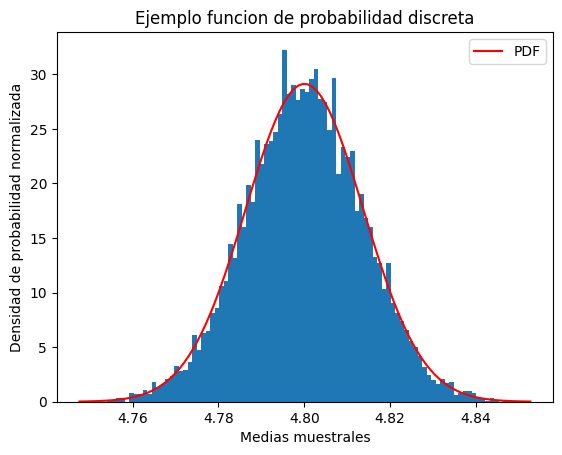

In [9]:
mu=np.mean(medias_binom)
sigma=np.std(medias_binom)
minimo=np.min(medias_binom)
maximo=np.max(medias_binom)

x = np.linspace(minimo, maximo,num=100)

pdf = norm.pdf(x, loc=mu, scale=sigma)


plt.hist(medias_binom, bins=100,density=True)

plt.plot(x, pdf, color='red', label='PDF') #Graficamos la distribución normal
plt.xlabel('Medias muestrales')
plt.ylabel('Densidad de probabilidad normalizada')
plt.title('Ejemplo funcion de probabilidad discreta')
plt.legend()
plt.show()